In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
import os

main_dir = "xrayData"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")

In [45]:
# MAKING SEPERATE FILES : 
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

In [46]:
# Creating a list of filenames in each directory
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])  # printing a list of the first 10 filenames

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID-19 (1).jpeg', 'COVID-19 (1).png', 'COVID-19 (10).jpeg', 'COVID-19 (101).jpg', 'COVID-19 (107).jpg', 'COVID-19 (11).jpeg', 'COVID-19 (11).jpg', 'COVID-19 (12).jpeg', 'COVID-19 (12).jpg', 'COVID-19 (13).jpeg']
['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1002).jpg', 'NORMAL(1005).jpg', 'NORMAL(1006).jpg', 'NORMAL(1007).jpg', 'NORMAL(1008).jpg', 'NORMAL(1009).jpg']
['COVID-19 (313).jpg', 'COVID-19 (353).jpg', 'COVID-19 (371).jpg', 'COVID-19 (425).jpg', 'COVID-19 (439).jpg', 'COVID-19 (457).jpg', 'COVID-19 (461).jpg', 'COVID-19 (475).jpg', 'COVID-19 (479).jpg', 'COVID-19 (485).jpg']
['NORMAL(10).jpg', 'NORMAL(1001).jpg', 'NORMAL(1003).jpg', 'NORMAL(1004).jpg', 'NORMAL(1011).jpg', 'NORMAL(1012).jpg', 'NORMAL(1015).jpg', 'NORMAL(1017).jpg', 'NORMAL(1020).jpg', 'NORMAL(1022).jpg']


In [47]:
# Printing total number of images present in each set
print('Total no of images in training set:', len(train_covid_names
                                                + train_normal_names))
print("Total no of images in test set:", len(test_covid_names
                                            + test_normal_names))

Total no of images in training set: 1811
Total no of images in test set: 484


In [48]:
# Data Visualization
import matplotlib.image as mpimg
# Setting the no of rows and columns
ROWS = 4
COLS = 4
# Setting the figure size
fig = plt.gcf()
# get current figure; allows us to get a reference to current figure when using pyplot
fig.set_size_inches(12, 12)

<Figure size 1200x1200 with 0 Axes>

In [77]:
# get the directory to each image file in the trainset
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[:8]]
print(covid_pic)
print(normal_pic)
# merge covid and normal lists
merged_list = covid_pic + normal_pic
print(merged_list)

['xrayData\\train\\COVID19\\COVID-19 (1).jpeg', 'xrayData\\train\\COVID19\\COVID-19 (1).png', 'xrayData\\train\\COVID19\\COVID-19 (10).jpeg', 'xrayData\\train\\COVID19\\COVID-19 (101).jpg', 'xrayData\\train\\COVID19\\COVID-19 (107).jpg', 'xrayData\\train\\COVID19\\COVID-19 (11).jpeg', 'xrayData\\train\\COVID19\\COVID-19 (11).jpg', 'xrayData\\train\\COVID19\\COVID-19 (12).jpeg']
['xrayData\\train\\NORMAL\\NORMAL(0).jpg', 'xrayData\\train\\NORMAL\\NORMAL(1).jpg', 'xrayData\\train\\NORMAL\\NORMAL(100).jpg', 'xrayData\\train\\NORMAL\\NORMAL(1000).jpg', 'xrayData\\train\\NORMAL\\NORMAL(1002).jpg', 'xrayData\\train\\NORMAL\\NORMAL(1005).jpg', 'xrayData\\train\\NORMAL\\NORMAL(1006).jpg', 'xrayData\\train\\NORMAL\\NORMAL(1007).jpg']
['xrayData\\train\\COVID19\\COVID-19 (1).jpeg', 'xrayData\\train\\COVID19\\COVID-19 (1).png', 'xrayData\\train\\COVID19\\COVID-19 (10).jpeg', 'xrayData\\train\\COVID19\\COVID-19 (101).jpg', 'xrayData\\train\\COVID19\\COVID-19 (107).jpg', 'xrayData\\train\\COVID19\\

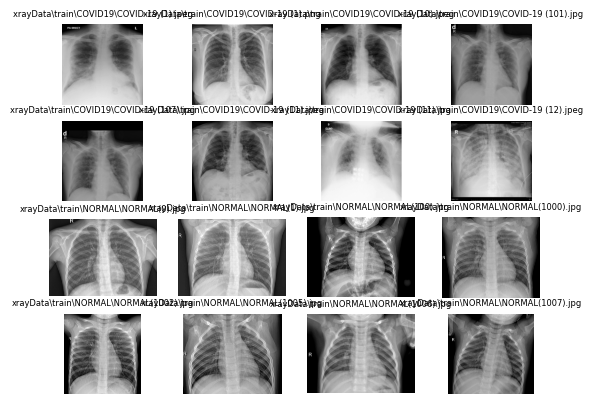

In [85]:
# Plotting the images in the merged list
for i, img_path in enumerate(merged_list):
    # getting the filename from the directory
    data = img_path.split('/', 6)[0]
    # creating a subplot of images with the no. of rows and colums with index no
    sp = plt.subplot(ROWS, COLS, i+1)
    # turn off axis
    sp.axis('Off')
    # reading the image data to an array
    img = mpimg.imread(img_path)
    # setting title of plot as the filename
    sp.set_title(data, fontsize=6)
    # displaying data as image
    plt.imshow(img, cmap='gray')
    
plt.show()  # display the plot

In [51]:
# Data Preprocessing and Augmentation
# Generate training, testing and validation batches
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,  # using 20% of training data for validation 
                                zoom_range=0.2,
                                horizontal_flip=True)
dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

In [52]:
# Awesome HyperParameters!!!
TARGET_SIZE = (200, 200)
BATCH_SIZE = 32
CLASS_MODE = 'binary'  # for two classes; categorical for over 2 classes

# Connecting the ImageDataGenerator objects to our dataset
train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=TARGET_SIZE,
                                                 subset='training',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode=CLASS_MODE)

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size=TARGET_SIZE,
                                                      subset='validation',
                                                      batch_size=BATCH_SIZE,
                                                      class_mode=CLASS_MODE)
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode=CLASS_MODE)

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [53]:
# Get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [54]:
# Get the image shape
train_generator.image_shape

(200, 200, 3)

In [56]:
# Building CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (5,5), padding='same', activation='relu',
                input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 64)       

In [57]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = 35, 
                    validation_data = validation_generator)

Epoch 1/35
46/46 [==============================] - 178s 4s/step - loss: 1.4150 - accuracy: 0.7950 - val_loss: 0.2482 - val_accuracy: 0.8867
Epoch 2/35
46/46 [==============================] - 136s 3s/step - loss: 0.2071 - accuracy: 0.9227 - val_loss: 0.1311 - val_accuracy: 0.9475
Epoch 3/35
46/46 [==============================] - 134s 3s/step - loss: 0.1538 - accuracy: 0.9462 - val_loss: 0.1131 - val_accuracy: 0.9641
Epoch 4/35
46/46 [==============================] - 148s 3s/step - loss: 0.1186 - accuracy: 0.9600 - val_loss: 0.0691 - val_accuracy: 0.9751
Epoch 5/35
46/46 [==============================] - 145s 3s/step - loss: 0.1172 - accuracy: 0.9634 - val_loss: 0.1116 - val_accuracy: 0.9503
Epoch 6/35
46/46 [==============================] - 150s 3s/step - loss: 0.1134 - accuracy: 0.9607 - val_loss: 0.0868 - val_accuracy: 0.9669
Epoch 7/35
46/46 [==============================] - 150s 3s/step - loss: 0.1098 - accuracy: 0.9586 - val_loss: 0.0620 - val_accuracy: 0.9834
Epoch 8/35
46

In [62]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

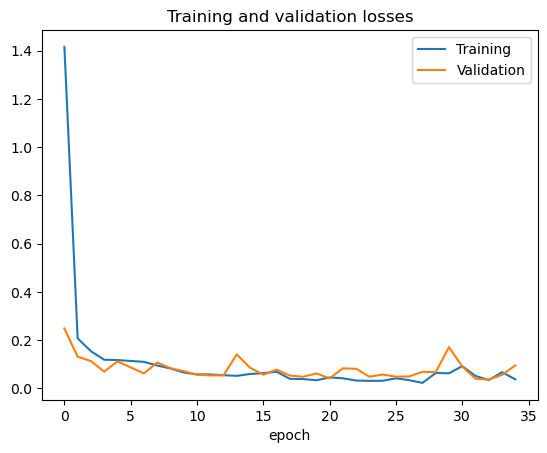

In [63]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

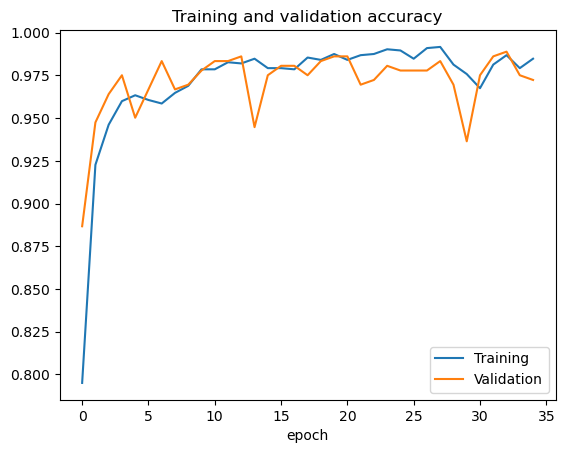

In [64]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [65]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 17s 1s/step - loss: 0.0732 - accuracy: 0.9731
Test Set Loss :  0.07317418605089188
Test Set Accuracy :  0.9731404781341553


In [86]:
# Making a Single Prediction
import numpy as np
import keras.utils as image

# load and resize image to 200x200
test_image = image.load_img('xrayData/test/COVID19/COVID-19 (457).jpg',target_size=(200,200))

# convert image to numpy array
images = image.img_to_array(test_image)
# expand dimension of image
images = np.expand_dims(images, axis=0)
# making prediction with model
prediction = model.predict(images)
    
if prediction == 0:
  print('COVID Detected')
else:
  print('Report is Normal')

1/1 [==============================] - 0s 77ms/step
COVID Detected


In [87]:
model.save("xraycovidmodel.h5")